### 1. 전처리 의미
+ 데이터 클리닝 : 결측치 처리, 이상치 확인 및 정제 등
+ 데이터 통합 : 다양한 데이터 파일의 결합 등
+ 데이터 변환 : 스케일링, 요약 등
+ 데이터 축소 : 변수 축소, 라벨링 등
+ 불균형 데이터 처리 : 언더샘플링, 오버샘플링 등
+ 데이터 분할 : train, test 분할 등

데이터 EDA를 수행하고 목적에 따라 데이터를 변환한 후 분석을 시작하기 전에 수행하는 전처리를 살펴보자.

### 2. 이상치 확인 및 정제

### 2.1 이상치의 의미

+ 결측치나 값이 크게 차이가 나는 데이터
+ 분석 모델의 성능을 떨어뜨리거나 악영향을 줄 수 있으므로 분석 전에 처리해주는 것이 좋다.

#### 2.2 이상치 확인

+ 분석가가 이상치를 판단하는 기준을 정해야 한다.


IQR 방식

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


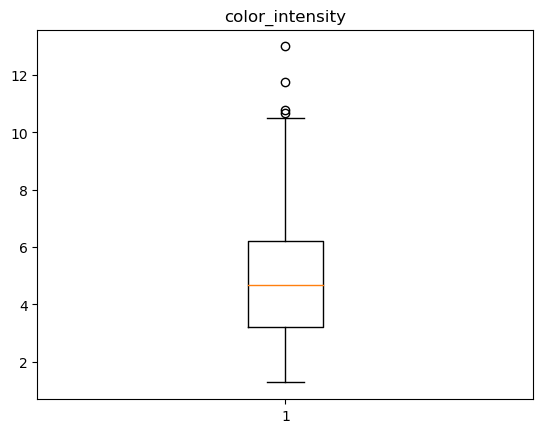

In [53]:
plt.boxplot(data = wine, x = 'color_intensity')
plt.title('color_intensity')
plt.show()

In [54]:
IQR = wine['color_intensity'].quantile(0.75) - wine['color_intensity'].quantile(0.25)
upper = wine['color_intensity'].quantile(0.75) + IQR * 1.5
lower = wine['color_intensity'].quantile(0.25) - IQR * 1.5

outliers = wine[(wine['color_intensity'] >= upper) | (wine['color_intensity'] <= lower)]['color_intensity']
outliers

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

이상치 정제

In [55]:
# 이상치 제거
drop_outliers = wine.drop(index = outliers.index)

print('original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

original : (178, 14)
Drop outliers : (174, 14)


In [56]:
wine.loc[outliers.index, 'color_intensity']

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

In [67]:
# 이상치 대체
import numpy as np
## 이상치 NaN으로 대체
wine.loc[outliers.index, 'color_intensity'] = np.NaN

In [69]:
## NaN이 된 이상치를 평균으로 대체
wine['color_intensity'].fillna(wine['color_intensity'].median(), inplace = True)
wine.loc[outliers.index, 'color_intensity']

151    4.6
158    4.6
159    4.6
166    4.6
Name: color_intensity, dtype: float64

### 3. 범주형 변수 처리

+ 범주형 번수를 더미변수화하여 모델이 이해할 수 있는 형태로 만든다.

In [75]:
from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns= iris_load.feature_names)
iris['target'] = iris_load.target
iris.target = iris.target.map({0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
iris_dummy = pd.get_dummies(iris, columns = ['target'], drop_first= True).astype('float')
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,0.0,0.0
1,4.9,3.0,1.4,0.2,0.0,0.0
2,4.7,3.2,1.3,0.2,0.0,0.0
3,4.6,3.1,1.5,0.2,0.0,0.0
4,5.0,3.6,1.4,0.2,0.0,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,1.0


### 4. 데이터 분할

+ 훈련, 테스트 셋으로 분할하는 과정
+ 추출 과정에서 원본 범주의 비율과 차이나는 비율로 추출하는 경우 분석 성능에 악영향을 미칠 수 있음
+ stratify = y 설정으로 층화추출 가능

In [80]:
X = iris.drop(['target'], axis = 1)
y = iris['target']

from sklearn.model_selection import train_test_split

# stratify = y 로 층화추출
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(105, 4) (45, 4)


### 5. 데이터 스케일링

+ 변수들 간 데이터의 범위가 크게 차이날 경우 잘 동작하지 않는다.
+ 범위가 큰 변수가 범위가 작은 변수에 비해 종속변수에 큰 영향을 미친다고 판단한다.
+ 이 상황을 스케일링을 통해 모든 컬럼의 값의 범위를 같게 만들어준다. 

스케일링 종류와 특징
+ Standard scaler
    + 표준화 방식의 기본 스케일링으로 컬럼들을 평균이 0, 분산이 1인 정규분포로 스케일링한다.
    + 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용하는 것이 좋다.
    + 회귀보다는 분류분석에서 유용하다.

+ MinMax scaler
    + 정규화 방심으로 컬럼들을 0 ~ 1 사이의 값으로 스케일링하는 방식
    + 이상치에 매우 민감하므로 이상치를 미리 정제한 후 수행하는 것이 좋다.
    + 분류보다는 회귀에 유용한 방식이다.

+ Robust Scaler
    + 평균과 분산 대신 중앙값과 사분위 값을 활용하는 방식
    + 중앙값을 0으로 설정하고 IQR 을 사용하여 이상치의 영향을 최소화한다.
    + quantile_range를 조정하여 더 넓게 좁은 범위의 값을 이상치로 설정하여 정제할 수 있다.

훈련, 테스트 셋으로 나눴을 경우 훈련 셋 따로, 테스트 셋 따로 스케일링을 해주어야 한다.

In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StandardScaler
scaler1 = StandardScaler()
X_train_sc = scaler1.fit_transform(X_train)
X_test_sc = scaler1.fit_transform(X_test)

print()
print('[Standard Scaling]')
print('train_scaled')
print('(min, max) : {:.2f} {:.2f}, (mean, std) : {:.2f} {:.2f}'.format(X_train_sc.max(), X_train_sc.min(), X_train_sc.mean(), X_train_sc.std()))

print('test_scaled')
print('(min, max) : {:.2f} {:.2f}, (mean, std) : {:.2f} {:.2f}'.format(X_test_sc.max(), X_test_sc.min(), X_test_sc.mean(), X_test_sc.std()))

# MinMaxScaler
scaler2 = MinMaxScaler()
X_train_sc = scaler2.fit_transform(X_train)
X_test_sc = scaler2.fit_transform(X_test)

print()
print('[MinMax Scaling]')
print('train_scaled')
print('(min, max) : {:.2f} {:.2f}, (mean, std) : {:.2f} {:.2f}'.format(X_train_sc.max(), X_train_sc.min(), X_train_sc.mean(), X_train_sc.std()))

print('test_scaled')
print('(min, max) : {:.2f} {:.2f}, (mean, std) : {:.2f} {:.2f}'.format(X_test_sc.max(), X_test_sc.min(), X_test_sc.mean(), X_test_sc.std()))

# RobustScaler
scaler3 = RobustScaler()
X_train_sc = scaler3.fit_transform(X_train)
X_test_sc = scaler3.fit_transform(X_test)

print()
print('[Robust Scaling]')
print('train_scaled')
print('(min, max) : {:.2f} {:.2f}, (mean, std) : {:.2f} {:.2f}'.format(X_train_sc.max(), X_train_sc.min(), X_train_sc.mean(), X_train_sc.std()))

print('test_scaled')
print('(min, max) : {:.2f} {:.2f}, (mean, std) : {:.2f} {:.2f}'.format(X_test_sc.max(), X_test_sc.min(), X_test_sc.mean(), X_test_sc.std()))


[Standard Scaling]
train_scaled
(min, max) : 2.96 -2.32, (mean, std) : 0.00 1.00
test_scaled
(min, max) : 2.46 -2.00, (mean, std) : -0.00 1.00

[MinMax Scaling]
train_scaled
(min, max) : 1.00 0.00, (mean, std) : 0.45 0.27
test_scaled
(min, max) : 1.00 0.00, (mean, std) : 0.47 0.29

[Robust Scaling]
train_scaled
(min, max) : 2.80 -2.00, (mean, std) : -0.00 0.67
test_scaled
(min, max) : 2.50 -1.75, (mean, std) : -0.06 0.66


### 6. 차원축소